In [2]:
!pip install arabic_reshaper python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 7.5 MB/s eta 0:00:00


<ipython-input-3-7f4fca6f8a87>:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


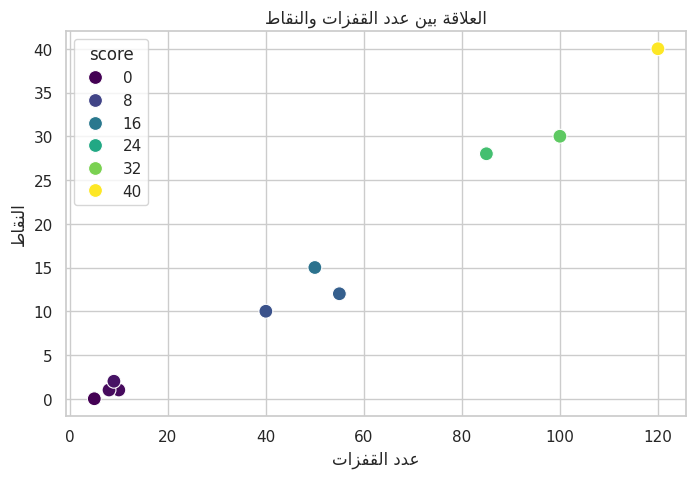

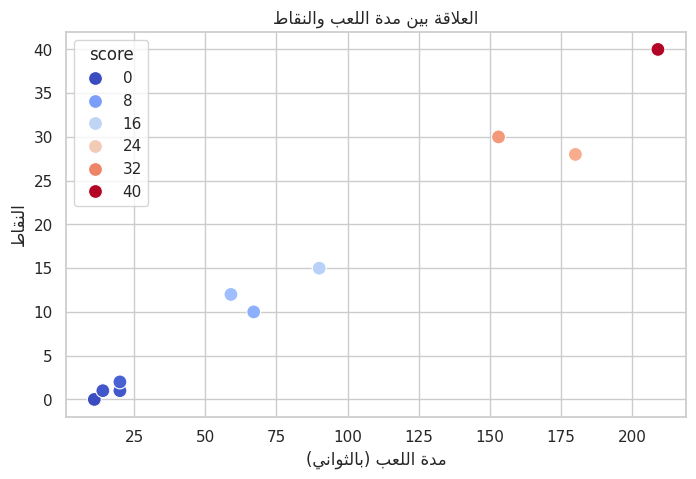

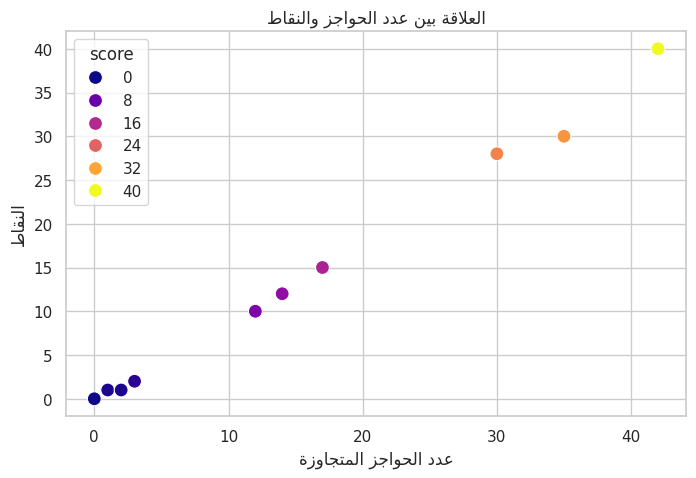

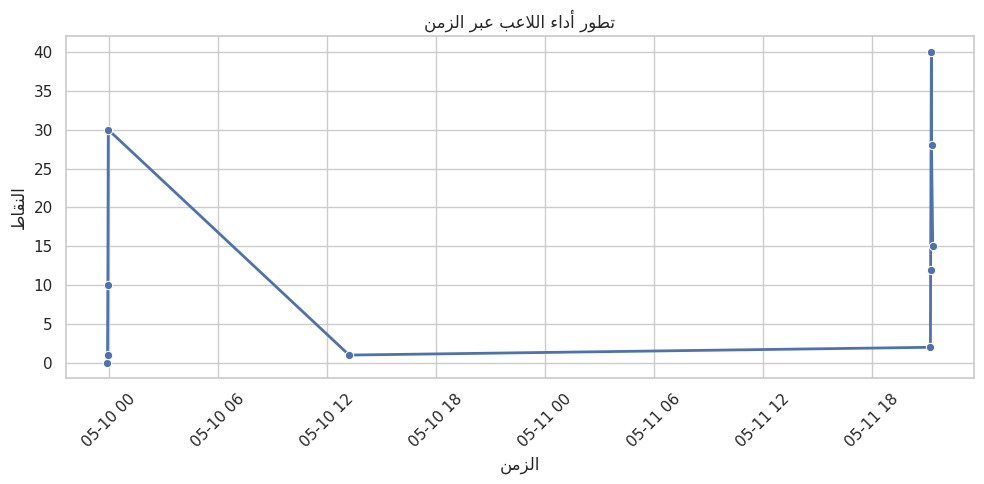

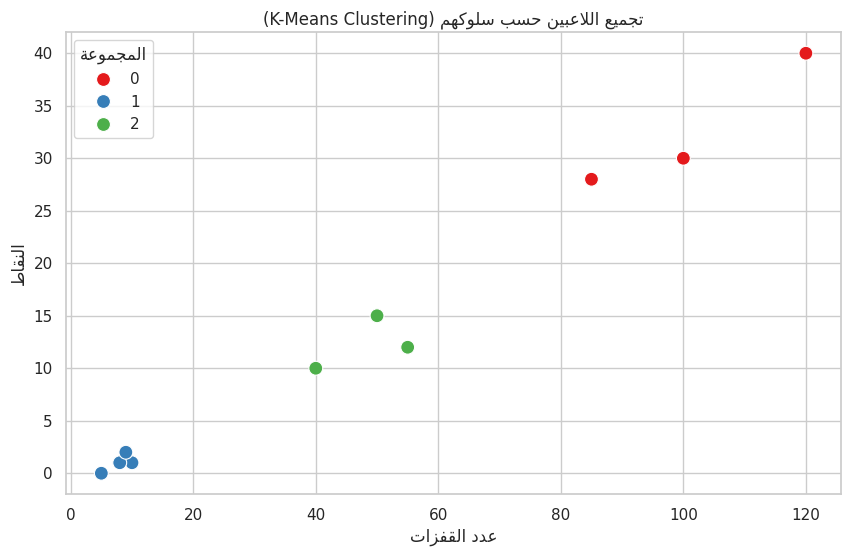

دقة النموذج:  1.0
تقرير التصنيف:
               precision    recall  f1-score   support

         فشل       1.00      1.00      1.00         2
        نجاح       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



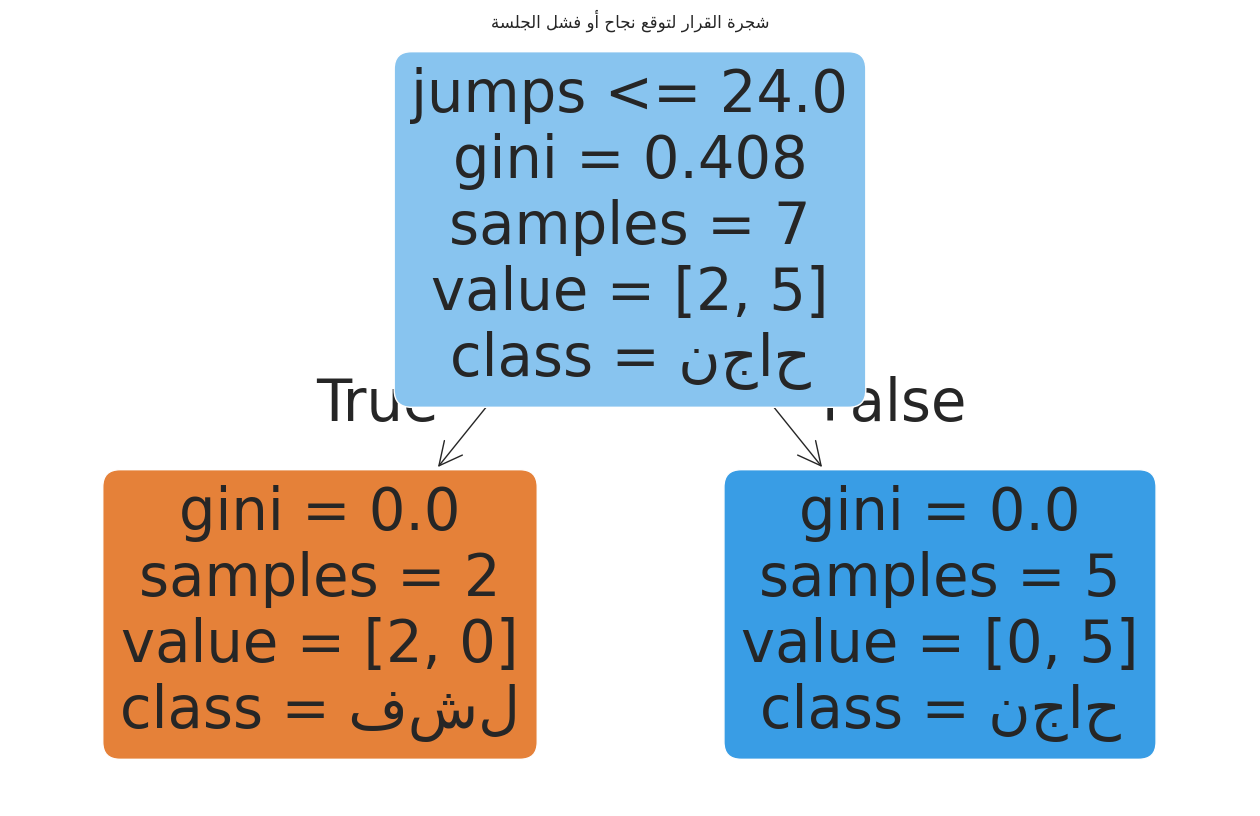


مصفوفة الترابط بين خصائص اللعب:
                 duration     jumps     score  obstaclesPassed
duration         1.000000  0.970276  0.989033         0.983609
jumps            0.970276  1.000000  0.991750         0.994448
score            0.989033  0.991750  1.000000         0.997778
obstaclesPassed  0.983609  0.994448  0.997778         1.000000

متوسط القيم لكل مجموعة (Cluster):
           duration       jumps      score  obstaclesPassed
cluster                                                    
0        180.666667  101.666667  32.666667        35.666667
1         16.250000    8.000000   1.000000         1.500000
2         72.000000   48.333333  12.333333        14.333333

توصيات التصميم بناءً على التجميع:
- المجموعة 0: اللاعبون يحققون أداء جيد.
- المجموعة 1: اللاعبون في هذه المجموعة يحققون نقاطًا منخفضة، يُفضل إضافة تدريب أو مساعدة إضافية في المراحل الأولى.
- المجموعة 2: اللاعبون يحققون أداء جيد.


In [3]:
# -*- coding: utf-8 -*-

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import arabic_reshaper
from bidi.algorithm import get_display

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False
sns.set(style="whitegrid")

# دالة لإصلاح النص العربي للرسوم فقط
def fix_arabic(text):
    reshaped_text = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped_text)
    return bidi_text

# بيانات اللعبة
data = [
    {"date": "5/9/2025, 11:53:50 PM", "duration": "11 seconds", "jumps": 5, "score": 0, "obstaclesPassed": 0},
    {"date": "5/9/2025, 11:54:16 PM", "duration": "14 seconds", "jumps": 10, "score": 1, "obstaclesPassed": 1},
    {"date": "5/9/2025, 11:55:19 PM", "duration": "67 seconds", "jumps": 40, "score": 10, "obstaclesPassed": 12},
    {"date": "5/9/2025, 11:56:46 PM", "duration": "153 seconds", "jumps": 100, "score": 30, "obstaclesPassed": 35},
    {"date": "5/10/2025, 1:12:26 PM", "duration": "20 seconds", "jumps": 8, "score": 1, "obstaclesPassed": 2},
    {"date": "5/11/2025, 9:12:22 PM", "duration": "20 seconds", "jumps": 9, "score": 2, "obstaclesPassed": 3},
    {"date": "5/11/2025, 9:13:01 PM", "duration": "59 seconds", "jumps": 55, "score": 12, "obstaclesPassed": 14},
    {"date": "5/11/2025, 9:15:31 PM", "duration": "209 seconds", "jumps": 120, "score": 40, "obstaclesPassed": 42},
    {"date": "5/11/2025, 9:16:00 PM", "duration": "180 seconds", "jumps": 85, "score": 28, "obstaclesPassed": 30},
    {"date": "5/11/2025, 9:20:00 PM", "duration": "90 seconds", "jumps": 50, "score": 15, "obstaclesPassed": 17}
]

df = pd.DataFrame(data)
df['duration'] = df['duration'].str.replace(' seconds', '').astype(int)
df['date'] = pd.to_datetime(df['date'])

# --- الرسومات ---

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='jumps', y='score', hue='score', palette='viridis', s=100)
plt.title(fix_arabic('العلاقة بين عدد القفزات والنقاط'))
plt.xlabel(fix_arabic('عدد القفزات'))
plt.ylabel(fix_arabic('النقاط'))
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='duration', y='score', hue='score', palette='coolwarm', s=100)
plt.title(fix_arabic('العلاقة بين مدة اللعب والنقاط'))
plt.xlabel(fix_arabic('مدة اللعب (بالثواني)'))
plt.ylabel(fix_arabic('النقاط'))
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='obstaclesPassed', y='score', hue='score', palette='plasma', s=100)
plt.title(fix_arabic('العلاقة بين عدد الحواجز والنقاط'))
plt.xlabel(fix_arabic('عدد الحواجز المتجاوزة'))
plt.ylabel(fix_arabic('النقاط'))
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='date', y='score', marker='o', linewidth=2)
plt.title(fix_arabic('تطور أداء اللاعب عبر الزمن'))
plt.xlabel(fix_arabic('الزمن'))
plt.ylabel(fix_arabic('النقاط'))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# --- تجميع اللاعبين ---

features = df[['duration', 'jumps', 'score', 'obstaclesPassed']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(features_scaled)
df['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='jumps', y='score', hue='cluster', palette='Set1', s=100)
plt.title(fix_arabic('تجميع اللاعبين حسب سلوكهم (K-Means Clustering)'))
plt.xlabel(fix_arabic('عدد القفزات'))
plt.ylabel(fix_arabic('النقاط'))
plt.legend(title=fix_arabic('المجموعة'))
plt.grid(True)
plt.show()

# --- التنبؤ بسلوك اللاعبين ---

df['success'] = (df['score'] >= 10).astype(int)
X = df[['duration', 'jumps', 'obstaclesPassed']]
y = df['success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("دقة النموذج: ", accuracy_score(y_test, y_pred))  # طباعة عربية عادية بدون fix_arabic
print("تقرير التصنيف:\n", classification_report(y_test, y_pred, target_names=['فشل', 'نجاح']))

plt.figure(figsize=(16, 10))
plot_tree(clf, feature_names=X.columns, class_names=['فشل', 'نجاح'], filled=True, rounded=True)
plt.title(fix_arabic("شجرة القرار لتوقع نجاح أو فشل الجلسة"))
plt.show()

# --- تحليل أنماط اللعب والتوصيات ---

print("\nمصفوفة الترابط بين خصائص اللعب:")  # طباعة عادية
corr = df[['duration', 'jumps', 'score', 'obstaclesPassed']].corr()
print(corr)

print("\nمتوسط القيم لكل مجموعة (Cluster):")  # طباعة عادية
cluster_summary = df.groupby('cluster').mean()[['duration', 'jumps', 'score', 'obstaclesPassed']]
print(cluster_summary)

print("\nتوصيات التصميم بناءً على التجميع:")  # طباعة عادية
recommendations = []
for cluster_id, row in cluster_summary.iterrows():
    rec = f"المجموعة {cluster_id}: "
    if row['score'] < 10:
        rec += "اللاعبون في هذه المجموعة يحققون نقاطًا منخفضة، يُفضل إضافة تدريب أو مساعدة إضافية في المراحل الأولى."
    else:
        rec += "اللاعبون يحققون أداء جيد."
    recommendations.append(rec)

for r in recommendations:
    print("-", r)
